## ANALISIS DE DATOS DE ACTIVIDAD ELCTRODERMICA (IBI)

El presente es para analizar los datos de la actividad electrodermica del smartwatch, el cual tiene un procesamiento de datos en 4 Hz

In [505]:
# Importando Pandas y otras librerias
import pandas as pd
import numpy as np

In [506]:
PACIENTE = '015'
PATH_FOLDER = 'G:\\Dataset\\big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2\\'+PACIENTE+'\\'

In [507]:
# Parametros para calcular los picos
PROMINENCIA = 0.3
DISTANCIA = 4

In [508]:
# Leyendo el CSV
eda_values = pd.read_csv(PATH_FOLDER + 'EDA_'+PACIENTE+'.csv', engine='python', na_values="not available")

In [509]:
eda_values.head(20)

,datetime,eda
0,2020-07-24 07:07:49.000,0.000000
1,2020-07-24 07:07:49.250,0.003842
2,2020-07-24 07:07:49.500,0.038419
3,2020-07-24 07:07:49.750,0.038419
4,2020-07-24 07:07:50.000,0.038419
5,2020-07-24 07:07:50.250,0.039700
6,2020-07-24 07:07:50.500,0.040980
7,2020-07-24 07:07:50.750,0.084522
8,2020-07-24 07:07:51.000,0.037138
9,2020-07-24 07:07:51.250,0.034577


In [510]:
eda_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746216 entries, 0 to 1746215
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1    eda      float64
dtypes: float64(1), object(1)
memory usage: 26.6+ MB


In [511]:
eda_values.count()

datetime    1746216
 eda        1746216
dtype: int64

In [512]:
eda_values["datetime"].head()

0    2020-07-24 07:07:49.000
1    2020-07-24 07:07:49.250
2    2020-07-24 07:07:49.500
3    2020-07-24 07:07:49.750
4    2020-07-24 07:07:50.000
Name: datetime, dtype: object

## Trabajando para detectar los picos
Este proceso vamos a realizar graficos de la data para poder definir los valores de estres que como se menciona en la documentacion tiene una importancia de 8.2% sobre la importancia para definir el nivel de glucosa

<Axes: >

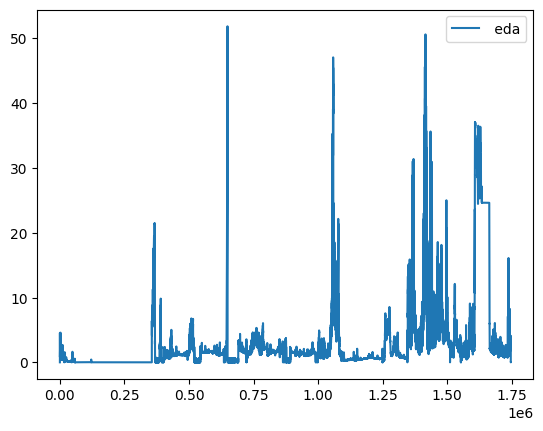

In [513]:
eda_values.plot()

In [514]:
import seaborn as sns
from scipy.signal import find_peaks as fp

## Deteccion de picos de EDA para definir el estres

In [515]:
p2, _ = fp(eda_values[' eda'], prominence=PROMINENCIA,distance=DISTANCIA)
p2

array([     32,      43,      47, ..., 1746163, 1746192, 1746206],
      dtype=int64)

In [516]:
# MOSTRAMOS EL GRAFICO CON LOS PICOS CON LA PROMINENCIA INDICADA EN 0.3
# sns.scatterplot(data=eda_values.iloc[p2],
#                 x='datetime',
#                 y=' eda',
#                 color='green',
#                 alpha=0.5)

In [517]:
# Extraemos los indices
p2 = pd.DataFrame(p2, index=p2, columns=['indice'])
p2.head()

,indice
32,32
43,43
47,47
91,91
108,108


In [518]:
# Añadimos en el dataset los picos detectados
eda_values['peak'] = 0
eda_values.loc[p2.index, 'peak'] = 1
print(eda_values.head(35))

                   datetime       eda  peak
0   2020-07-24 07:07:49.000  0.000000     0
1   2020-07-24 07:07:49.250  0.003842     0
2   2020-07-24 07:07:49.500  0.038419     0
3   2020-07-24 07:07:49.750  0.038419     0
4   2020-07-24 07:07:50.000  0.038419     0
5   2020-07-24 07:07:50.250  0.039700     0
6   2020-07-24 07:07:50.500  0.040980     0
7   2020-07-24 07:07:50.750  0.084522     0
8   2020-07-24 07:07:51.000  0.037138     0
9   2020-07-24 07:07:51.250  0.034577     0
10  2020-07-24 07:07:51.500  0.035858     0
11  2020-07-24 07:07:51.750  0.035858     0
12  2020-07-24 07:07:52.000  0.035858     0
13  2020-07-24 07:07:52.250  0.064032     0
14  2020-07-24 07:07:52.500  0.096048     0
15  2020-07-24 07:07:52.750  0.060190     0
16  2020-07-24 07:07:53.000  0.030735     0
17  2020-07-24 07:07:53.250  0.032016     0
18  2020-07-24 07:07:53.500  0.029455     0
19  2020-07-24 07:07:53.750  0.028174     0
20  2020-07-24 07:07:54.000  0.026893     0
21  2020-07-24 07:07:54.250  0.0

### Trabajando con Datetime
Lo primero sera convertir los datetime a el formato correcto, ya que lo esta detectando como object, lo siguiente sera colocar como index las fechas y al final agrupar por cada 5 minutos los datos para obtener el promedio y media de los datos


In [519]:
# Convertimos en fechas los datimetimes
eda_values['datetime'] = pd.to_datetime(eda_values['datetime'])

In [520]:
eda_values.head()

,datetime,eda,peak
0,2020-07-24 07:07:49.000,0.000000,0
1,2020-07-24 07:07:49.250,0.003842,0
2,2020-07-24 07:07:49.500,0.038419,0
3,2020-07-24 07:07:49.750,0.038419,0
4,2020-07-24 07:07:50.000,0.038419,0


In [521]:
# # Redondear al intervalo de 5 minutos más cercano
# eda_values['5min'] = eda_values['datetime'].dt.floor('5T')

# # Agrupar por cada 5 minutos y calcular la cantidad de picos y la media de los picos
# grouped = eda_values.groupby('5min').agg({
#     'max_eda_per_second': ['count', 'mean']
# }).reset_index()

# # Renombrar columnas para mayor claridad
# grouped.columns = ['5min', 'count_of_peaks', 'mean_of_peaks']

# # Merge de vuelta al DataFrame original
# eda_values = eda_values.merge(grouped, on='5min', how='left')

In [522]:
eda_values.head(30)

,datetime,eda,peak
0,2020-07-24 07:07:49.000,0.000000,0
1,2020-07-24 07:07:49.250,0.003842,0
2,2020-07-24 07:07:49.500,0.038419,0
3,2020-07-24 07:07:49.750,0.038419,0
4,2020-07-24 07:07:50.000,0.038419,0
5,2020-07-24 07:07:50.250,0.039700,0
6,2020-07-24 07:07:50.500,0.040980,0
7,2020-07-24 07:07:50.750,0.084522,0
8,2020-07-24 07:07:51.000,0.037138,0
9,2020-07-24 07:07:51.250,0.034577,0


In [523]:


## Se coloca indices como datetime
eda_values = eda_values.set_index('datetime')
print(eda_values.columns)


Index([' eda', 'peak'], dtype='object')


In [524]:
# Trabajamos con un dataset de EDA values para agruparlo por 5 min
df_procesado_5min = eda_values[' eda'].resample('5min') 
# Para picos tambien
df_procesado_5min_picos = eda_values['peak'].resample('5min')
print('Datos generados en 5 min de agrupacion')



Datos generados en 5 min de agrupacion


### Calculamos le media, la mediana y demas factores de estadistica

En este caso tenemos que obtener el promedio, mediana, max, min, desviacion estandar y quartiles

In [525]:
# Funcion para calcular los cuartiles 1 y 3 que indican en el paper
# 
def quartiles(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.75)], index=['q1', 'q3'])


In [526]:
# Crear a serie de dataframe de 5 min
series5min = quartiles(df_procesado_5min)
series5min.head()

q1    datetime
2020-07-05 15:10:00    3.854705
2020-...
q3    datetime
2020-07-05 15:10:00     6.663115
2020...
dtype: object

### Aplicamos los calculos estadisticos
Para este punto, tenemos 2 arrays de datos de EDA agrupados en 5 minutos y datos de picos de EDA agrupados en 5 min, ambos arrays distintos, a este punto vamos a generar la media, mediana, max, min, std, etc para esos valores.
En el caso de picos solo queremos conocer que tan comun fue el pico en estos 5 minutos, ello con el promedio, y la cantidad de picos en ese transcurso.

In [527]:
# Definimos los metodos del dataframe a calcular
df_5min = df_procesado_5min.agg(['mean', 'median', 'max', 'min', 'std'])
df_5min_peaks = df_procesado_5min_picos.agg({
    'count': lambda x: (x == 1).sum(),
    'promedio': 'mean'
})
print(df_5min.columns)
df_5min.head(20)

Index(['mean', 'median', 'max', 'min', 'std'], dtype='object')


,mean,median,max,min,std
datetime,,,,,
2020-07-05 15:10:00,4.936567,5.370151,7.389455,0.000000,2.139836
2020-07-05 15:15:00,7.399163,7.379870,8.803288,5.448343,0.839773
2020-07-05 15:20:00,7.120282,7.120772,8.012198,5.759631,0.294746
2020-07-05 15:25:00,8.486443,8.114680,11.263563,6.596502,1.190937
2020-07-05 15:30:00,9.328745,9.140408,12.509702,5.827090,1.889620
2020-07-05 15:35:00,13.512282,13.081343,17.568073,9.274548,1.832096
2020-07-05 15:40:00,12.287545,12.182192,16.944407,8.393572,1.414291
2020-07-05 15:45:00,16.970380,17.392574,19.485699,12.497197,1.319190
2020-07-05 15:50:00,20.165505,21.426064,21.428625,17.388731,1.861873


In [528]:
df_5min_peaks.head()

,count,promedio
datetime,,
2020-07-05 15:10:00,33,0.036344
2020-07-05 15:15:00,30,0.025000
2020-07-05 15:20:00,21,0.017500
2020-07-05 15:25:00,32,0.026667
2020-07-05 15:30:00,49,0.040833


In [529]:
df_5min.count()

mean      1165
median    1165
max       1165
min       1165
std       1165
dtype: int64

In [530]:
df_5min_peaks.count()

count       5712
promedio    1165
dtype: int64

In [ ]:
# Juntamos ambos valores ahora en un solo dataframe
df_5min['total_peaks'] = df_5min_peaks['count']
df_5min['mean_peaks'] = df_5min_peaks['promedio']
df_5min.head(10)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-05 15:10:00,4.936567,5.370151,7.389455,0.000000,2.139836,33,0.036344
2020-07-05 15:15:00,7.399163,7.379870,8.803288,5.448343,0.839773,30,0.025000
2020-07-05 15:20:00,7.120282,7.120772,8.012198,5.759631,0.294746,21,0.017500
2020-07-05 15:25:00,8.486443,8.114680,11.263563,6.596502,1.190937,32,0.026667
2020-07-05 15:30:00,9.328745,9.140408,12.509702,5.827090,1.889620,49,0.040833
2020-07-05 15:35:00,13.512282,13.081343,17.568073,9.274548,1.832096,59,0.049167
2020-07-05 15:40:00,12.287545,12.182192,16.944407,8.393572,1.414291,54,0.045000
2020-07-05 15:45:00,16.970380,17.392574,19.485699,12.497197,1.319190,26,0.021667
2020-07-05 15:50:00,20.165505,21.426064,21.428625,17.388731,1.861873,1,0.000833


In [532]:
df_5min.count()

mean           1165
median         1165
max            1165
min            1165
std            1165
total_peaks    5712
mean_peaks     1165
dtype: int64

In [533]:
df_5min.tail(10)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-25 10:20:00,1.051554,1.009881,2.196307,0.886804,0.174441,7,0.005833
2020-07-25 10:25:00,10.456952,11.371097,16.098848,2.137380,3.255757,62,0.051667
2020-07-25 10:30:00,9.586849,9.559759,12.581439,5.308711,1.359698,48,0.040000
2020-07-25 10:35:00,4.517029,4.201542,6.158029,3.585371,0.647557,20,0.016667
2020-07-25 10:40:00,4.558114,4.528770,5.303789,3.850542,0.360370,2,0.001667
2020-07-25 10:45:00,6.942214,7.193790,8.201790,4.578730,0.960546,5,0.004167
2020-07-25 10:50:00,3.621329,3.493778,5.746521,2.311784,0.745070,21,0.017500
2020-07-25 10:55:00,2.751467,2.753095,3.585120,2.315276,0.222736,11,0.009167
2020-07-25 11:00:00,2.074738,2.073163,4.091062,0.000000,0.348400,8,0.006667


## DATASET DE 1 HORA
Aplicamos exactamente lo mismo pero ahora aplicado a una hora

In [534]:
# Lo mismo aplicamos para 1 hora
df_procesado_1hora = eda_values[' eda'].resample('1h')
# Para picos tambien
df_procesado_5min_picos = eda_values['peak'].resample('1h') 
# Obtenemos el promedio
df_1hora = df_procesado_1hora.agg(['mean', 'median', 'max', 'min', 'std'])
df_1hora_peaks = df_procesado_5min_picos.agg({
    'count': lambda x: (x == 1).sum(),
    'promedio': 'mean'
})
# Juntamos ambos valores ahora en un solo dataframe
df_1hora['total_peaks'] = df_1hora_peaks['count']
df_1hora['mean_peaks'] = df_1hora_peaks['promedio']
# Removemos las columnas que no necesitamos por ahora
# df_1hora = df_1hora.drop(columns=columns_to_remove)
df_1hora.head(20)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-05 15:00:00,12.315457,11.263579,21.428625,0.000000,5.533738,407,0.034763
2020-07-05 16:00:00,0.970981,0.602081,19.925419,0.000000,2.431705,1065,0.073958
2020-07-05 17:00:00,1.837962,2.139776,9.831792,0.000000,1.942700,137,0.009514
2020-07-05 18:00:00,0.689392,0.603362,2.362840,0.000000,0.580213,156,0.010833
2020-07-05 19:00:00,1.076556,1.113644,1.919407,0.561424,0.281436,96,0.006667
2020-07-05 20:00:00,1.506824,1.163603,5.014055,0.585763,0.724830,99,0.006875
2020-07-05 21:00:00,1.099214,1.089205,2.448668,0.943268,0.054276,7,0.000486
2020-07-05 22:00:00,1.205991,1.193067,1.658078,1.102114,0.064930,2,0.000139
2020-07-05 23:00:00,1.151585,1.135421,1.523571,1.089304,0.046031,1,0.000069


In [535]:
# Separar los cuartiles en columnas individuales
# Obtenemos los quantiles
df_5min_quantil1 = df_procesado_5min.quantile(0.25)
df_5min_quantil3 = df_procesado_5min.quantile(0.75)
df_1hora_quantil1 = df_procesado_1hora.quantile(0.25)
df_1hora_quantil3 = df_procesado_1hora.quantile(0.75)
df_5min['q1'] = df_5min_quantil1
df_5min['q3'] = df_5min_quantil3
df_5min.head(10)
# df_1hora[['q1', 'q3']] = [df_1hora_quantil1,df_1hora_quantil3]


,mean,median,max,min,std,total_peaks,mean_peaks,q1,q3
datetime,,,,,,,,,
2020-07-05 15:10:00,4.936567,5.370151,7.389455,0.000000,2.139836,33,0.036344,3.854705,6.663115
2020-07-05 15:15:00,7.399163,7.379870,8.803288,5.448343,0.839773,30,0.025000,6.671163,8.194482
2020-07-05 15:20:00,7.120282,7.120772,8.012198,5.759631,0.294746,21,0.017500,6.946718,7.276261
2020-07-05 15:25:00,8.486443,8.114680,11.263563,6.596502,1.190937,32,0.026667,7.635061,9.327025
2020-07-05 15:30:00,9.328745,9.140408,12.509702,5.827090,1.889620,49,0.040833,7.761490,11.049953
2020-07-05 15:35:00,13.512282,13.081343,17.568073,9.274548,1.832096,59,0.049167,12.132449,15.225831
2020-07-05 15:40:00,12.287545,12.182192,16.944407,8.393572,1.414291,54,0.045000,11.255565,13.175536
2020-07-05 15:45:00,16.970380,17.392574,19.485699,12.497197,1.319190,26,0.021667,16.893166,17.393854
2020-07-05 15:50:00,20.165505,21.426064,21.428625,17.388731,1.861873,1,0.000833,17.392574,21.427343


In [536]:
df_5min.count()

mean           1165
median         1165
max            1165
min            1165
std            1165
total_peaks    5712
mean_peaks     1165
q1             1165
q3             1165
dtype: int64

In [537]:
# Igual con 1hora de dataset
df_1hora['q1'] = df_1hora_quantil1
df_1hora['q3'] = df_1hora_quantil3
df_1hora.head(10)

,mean,median,max,min,std,total_peaks,mean_peaks,q1,q3
datetime,,,,,,,,,
2020-07-05 15:00:00,12.315457,11.263579,21.428625,0.000000,5.533738,407,0.034763,7.374745,17.392574
2020-07-05 16:00:00,0.970981,0.602081,19.925419,0.000000,2.431705,1065,0.073958,0.543154,0.604643
2020-07-05 17:00:00,1.837962,2.139776,9.831792,0.000000,1.942700,137,0.009514,0.142194,2.358997
2020-07-05 18:00:00,0.689392,0.603362,2.362840,0.000000,0.580213,156,0.010833,0.481410,0.831720
2020-07-05 19:00:00,1.076556,1.113644,1.919407,0.561424,0.281436,96,0.006667,0.834282,1.373592
2020-07-05 20:00:00,1.506824,1.163603,5.014055,0.585763,0.724830,99,0.006875,1.063684,1.849421
2020-07-05 21:00:00,1.099214,1.089205,2.448668,0.943268,0.054276,7,0.000486,1.062304,1.127636
2020-07-05 22:00:00,1.205991,1.193067,1.658078,1.102114,0.064930,2,0.000139,1.158479,1.250713
2020-07-05 23:00:00,1.151585,1.135421,1.523571,1.089304,0.046031,1,0.000069,1.113644,1.177695


In [538]:
df_1hora.count()

mean           101
median         101
max            101
min            101
std            101
total_peaks    477
mean_peaks     101
q1             101
q3             101
dtype: int64

## LIMPIEZA DE DATOS
Algunas filas contienen datos NaN, vamos a limpiarlos

In [539]:
df_5min_cleaned = df_5min.dropna(subset=['mean'])
df_1hora_cleaned = df_1hora.dropna(subset=['mean'])
print('Cantidad de datos de dataset 5 min limpiado: ' + str(df_5min_cleaned.count()))
print('Cantidad de datos de dataset 1 hora limpiado: ' + str(df_1hora_cleaned.count()))

Cantidad de datos de dataset 5 min limpiado: mean           1165
median         1165
max            1165
min            1165
std            1165
total_peaks    1165
mean_peaks     1165
q1             1165
q3             1165
dtype: int64
Cantidad de datos de dataset 1 hora limpiado: mean           101
median         101
max            101
min            101
std            101
total_peaks    101
mean_peaks     101
q1             101
q3             101
dtype: int64


In [540]:
# Exportamos los resultados en un csv
df_5min_cleaned.to_csv("EDA_5min_"+PACIENTE+".csv")
df_1hora_cleaned.to_csv("EDA_1hora_"+PACIENTE+".csv")

### ARCHIVOS CSV GENERADOS CON EXITO PARA 5 MIN Y 1 HORA